# Expectation-Maximization Algorithm

Author: Arun Manohar

Email: arunmano121@outlook.com

License: BSD-3-Clause

A program to study Expectation-Maximization algorithm. Source sample points are generated using two Gaussians in user-defined proportion, and the problem parameters are estimated using EM algorithm. The results are plotted.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# define Gaussian function
def gaussian(x, mu, sig):
    '''
    returns the gaussian function given the x, mu and sig values.
    '''
    return 1./(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2)/2)

In [3]:
# setting parameters of the two Gaussians
while True:
    try:
        # get input
        print('\nFirst Gaussian parameters:')
        mu1 = float(input('Mean: '))
        sd1 = float(input('SD: '))
        prior1 = float(input('Proportion[%]: '))/100

        print('\nSecond Gaussian parameters:')
        mu2 = float(input('Mean: '))
        sd2 = float(input('SD: '))
        prior2 = float(input('Proportion[%]: '))/100

        if prior1 + prior2 != 1:
            print('\nSum of priors should be 100%%, got %0.2f%%'
                  % (100*(prior1 + prior2)))
        else:
            break
    except Exception as e:
        print(e)


First Gaussian parameters:


Mean:  1
SD:  1
Proportion[%]:  33



Second Gaussian parameters:


Mean:  2
SD:  2
Proportion[%]:  67


In [4]:
# 10000 x values randomly sampled across the two Gaussians
x_values = np.hstack((np.random.normal(mu1, sd1, int(prior1*10000)),
                      np.random.normal(mu2, sd2, int(prior2*10000))))

In [9]:
# the actual EM part begins
# estimated parameters prefix e_ - e_mu1, e_mu2, e_sd1, e_sd2...
# to start assume priors, e_p1, e_p2, means and SDs
e_p1 = np.random.rand()  # random initialization
e_p2 = np.random.rand()  # random initialization
# instead of very simple random assignment to e_mu1 and e_mu2, the
# following is done to preserve ordering of the clusters
e_mu1 = np.min(x_values) + np.random.rand()  # random mu1
e_mu2 = np.max(x_values) - np.random.rand()  # random mu2
e_sd1 = np.random.rand()  # random sd1 between 0-1
e_sd2 = np.random.rand()  # random sd2 between 0-1

cnt = 0  # iteration counter
epsilon = 1e-7  # tolerance threshold for parameters convergence
prev_param = 100*np.random.rand()  # random initialization
curr_param = 0  # initialization

print('\nRandom Initialization Parameters:')
print('Iteration: %d Prior1:%0.3f Prior2:%0.3f mu1:%0.3f mu2:%0.3f'
      ' SD1:%0.3f SD2:%0.3f\n' %
      (0, e_p1, e_p2, e_mu1, e_mu2, e_sd1, e_sd2))

# optimize parameters until delta is smaller tham epsilon
while abs(prev_param - curr_param) >= epsilon:

    # update counter
    cnt += 1

    # set prev_param from curr_param before updates are made
    prev_param = curr_param

    # prob of xi given it belongs to c1 cluster
    p_xi_c1 = gaussian(x_values, e_mu1, e_sd1)

    # prob of xi given it belongs to c2 cluster
    p_xi_c2 = gaussian(x_values, e_mu2, e_sd2)

    # prob of c1 and c2 cluster (given xi) - by Baye's rule
    # add 1e-10 to denominator to avoid divide by 0
    p_c1_xi = (e_p1 * p_xi_c1) / \
        (e_p1 * p_xi_c1 + e_p2 * p_xi_c2 + 1e-10)
    p_c2_xi = (e_p2 * p_xi_c2) / \
        (e_p1 * p_xi_c1 + e_p2 * p_xi_c2 + 1e-10)

    # update priors e_p1 and e_p2, means and SDs
    e_p1 = np.mean(p_c1_xi)
    e_p2 = np.mean(p_c2_xi)

    e_mu1 = np.sum(p_c1_xi * x_values) / (np.sum(p_c1_xi))
    e_mu2 = np.sum(p_c2_xi * x_values) / (np.sum(p_c2_xi))

    e_sd1 = np.sqrt(np.sum(p_c1_xi * (x_values - e_mu1)**2) /
                    (np.sum(p_c1_xi)))
    e_sd2 = np.sqrt(np.sum(p_c2_xi * (x_values - e_mu2)**2) /
                    (np.sum(p_c2_xi)))

    curr_param = np.mean([e_p1, e_p2, e_mu1, e_mu2, e_sd1, e_sd2])

    print('Iteration: %d Prior1:%0.3f Prior2:%0.3f mu1:%0.3f mu2:%0.3f'
          ' SD1:%0.3f SD2:%0.3f' %
          (cnt, e_p1, e_p2, e_mu1, e_mu2, e_sd1, e_sd2))

print('\nEM algorithm convergence after %d iterations!' % (cnt))
print('\nOriginal paramters of two Gaussian')
print('Prior1:%0.3f Prior2:%0.3f mu1:%0.3f mu2:%0.3f'
      ' SD1:%0.3f SD2:%0.3f' %
      (prior1, prior2, mu1, mu2, sd1, sd2))

print('\nEM estimated paramters of two Gaussian')
print('Prior1:%0.3f Prior2:%0.3f mu1:%0.3f mu2:%0.3f'
      ' SD1:%0.3f SD2:%0.3f' %
      (e_p1, e_p2, e_mu1, e_mu2, e_sd1, e_sd2))


Random Initialization Parameters:
Iteration: 0 Prior1:0.340 Prior2:0.103 mu1:-4.918 mu2:8.389 SD1:0.118 SD2:0.299

Iteration: 1 Prior1:0.001 Prior2:0.009 mu1:-4.829 mu2:7.100 SD1:0.432 SD2:0.540
Iteration: 2 Prior1:0.011 Prior2:0.123 mu1:-3.107 mu2:4.934 SD1:0.720 SD2:0.897
Iteration: 3 Prior1:0.207 Prior2:0.793 mu1:-0.605 mu2:2.306 SD1:0.870 SD2:1.472
Iteration: 4 Prior1:0.185 Prior2:0.815 mu1:-0.389 mu2:2.180 SD1:0.999 SD2:1.600
Iteration: 5 Prior1:0.175 Prior2:0.825 mu1:-0.203 mu2:2.108 SD1:1.061 SD2:1.669
Iteration: 6 Prior1:0.169 Prior2:0.831 mu1:-0.037 mu2:2.059 SD1:1.082 SD2:1.717
Iteration: 7 Prior1:0.167 Prior2:0.833 mu1:0.111 mu2:2.022 SD1:1.074 SD2:1.755
Iteration: 8 Prior1:0.166 Prior2:0.834 mu1:0.242 mu2:1.994 SD1:1.047 SD2:1.785
Iteration: 9 Prior1:0.167 Prior2:0.833 mu1:0.355 mu2:1.973 SD1:1.011 SD2:1.811
Iteration: 10 Prior1:0.168 Prior2:0.832 mu1:0.450 mu2:1.958 SD1:0.971 SD2:1.831
Iteration: 11 Prior1:0.171 Prior2:0.829 mu1:0.527 mu2:1.947 SD1:0.934 SD2:1.848
Iterati

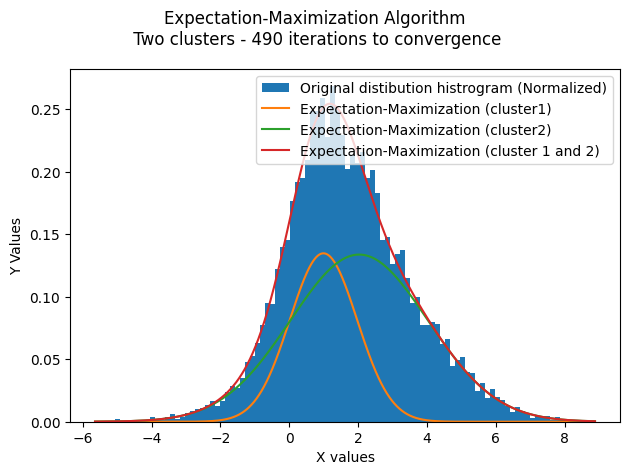

In [6]:
# sort x values prior to plotting
x_values.sort()

# plotting the histogram to visualize
fig, (ax) = plt.subplots(1, 1)
fig.suptitle('Expectation-Maximization Algorithm' +
             '\n Two clusters - %d iterations to convergence' % (cnt))

ax.hist(x_values, bins=100, density=True,
        label='Original distibution histrogram (Normalized)')
# in the following, multiply by 0.5 since it involves the sum of two
# normalized gaussians
ax.plot(x_values, prior1 * gaussian(x_values, e_mu1, e_sd1),
        label='Expectation-Maximization (cluster1)')
ax.plot(x_values, prior2 * gaussian(x_values, e_mu2, e_sd2),
        label='Expectation-Maximization (cluster2)')
ax.plot(x_values, prior1 * gaussian(x_values, e_mu1, e_sd1) +
        prior2 * gaussian(x_values, e_mu2, e_sd2),
        label='Expectation-Maximization (cluster 1 and 2)')
ax.set_ylabel('Y Values')
ax.set_xlabel('X values')
ax.legend()

plt.tight_layout()
plt.show()
